In [11]:
import os
from pathlib import Path
import cv2
import PIL
import matplotlib.pyplot as plt

In [ ]:
path_to_dataset = Path("wildfire_dataset")

In [12]:
fire_counts = []
nofire_counts = []

In [13]:
for img_dir in ['train', 'val', 'test']:
    path_imgs = path_to_dataset / img_dir
    path_imgs_fire = path_imgs / 'fire'
    path_imgs_no_fire = path_imgs / 'nofire'
    number_of_fire_imgs = len(os.listdir(path_imgs_fire))
    number_of_no_fire_imgs = len(os.listdir(path_imgs_no_fire))
    print(f"Number of fire images in {img_dir}: {number_of_fire_imgs}")
    print(f"Number of no fire images in {img_dir}: {number_of_no_fire_imgs}")
    fire_counts.append(len(os.listdir(path_imgs_fire)))
    nofire_counts.append(len(os.listdir(path_imgs_no_fire)))

Number of fire images in train: 730
Number of no fire images in train: 1157
Number of fire images in val: 157
Number of no fire images in val: 246
Number of fire images in test: 159
Number of no fire images in test: 251


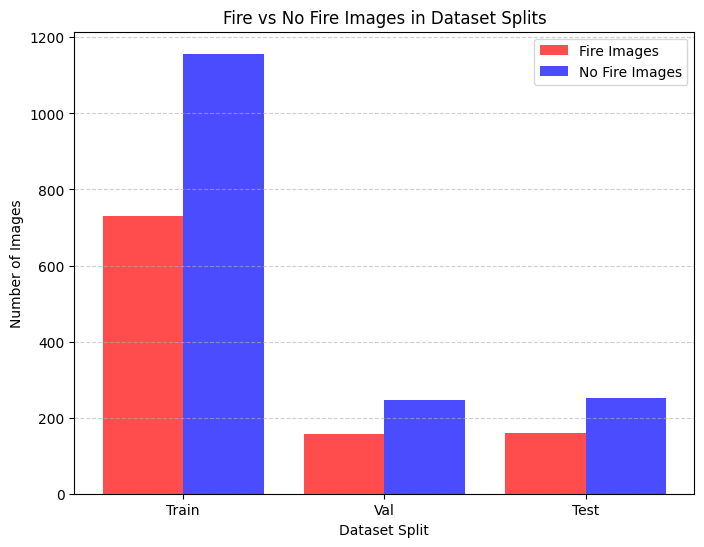

In [ ]:
x = range(3)
width = 0.4

plt.figure(figsize=(8, 6))
plt.bar(x, fire_counts, width=width, label='Fire Images', color='red', alpha=0.7)
plt.bar([p + width for p in x], nofire_counts, width=width, label='No Fire Images', color='blue', alpha=0.7)

plt.xticks([p + width/2 for p in x], ['Train', 'Val', 'Test'])
plt.xlabel("Dataset Split")
plt.ylabel("Number of Images")
plt.title("Fire vs No Fire Images in Dataset Splits")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


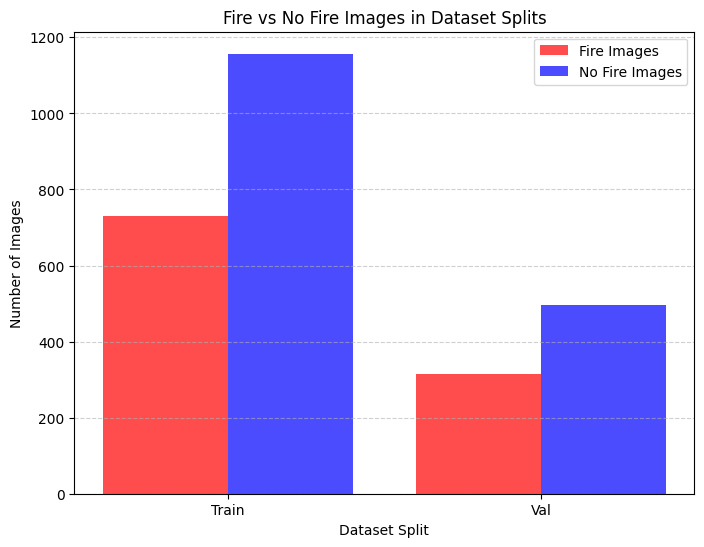

In [17]:
x = range(2)
width = 0.4
fire_counts[1] += fire_counts[2]
nofire_counts[1] += nofire_counts[2]
fire_counts = fire_counts[:2]
nofire_counts = nofire_counts[:2]

plt.figure(figsize=(8, 6))
plt.bar(x, fire_counts, width=width, label='Fire Images', color='red', alpha=0.7)
plt.bar([p + width for p in x], nofire_counts, width=width, label='No Fire Images', color='blue', alpha=0.7)

plt.xticks([p + width/2 for p in x], ['Train', 'Val'])
plt.xlabel("Dataset Split")
plt.ylabel("Number of Images")
plt.title("Fire vs No Fire Images in Dataset Splits")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Percentage of fire images in train set: 38.69%
Percentage of fire images in val set: 38.87%
Percentage of train set: 69.89%
Percentage of val set: 30.11%


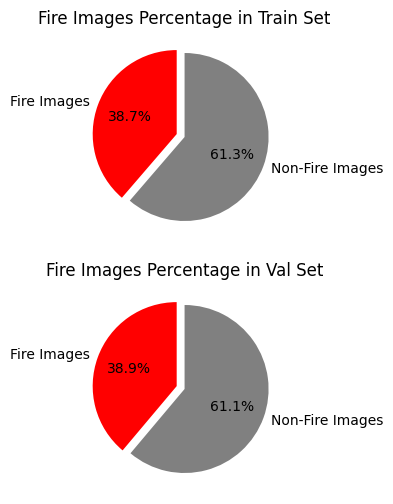

In [22]:
total_train = fire_counts[0] + nofire_counts[0]
total_val = fire_counts[1] + nofire_counts[1]
total_total = total_train + total_val
fire_percent_train = fire_counts[0] / total_train * 100
fire_percent_val = fire_counts[1] / total_val * 100
percent_train = total_train / total_total * 100
percent_val = total_val / total_total * 100
print(f"Percentage of fire images in train set: {fire_percent_train:.2f}%")
print(f"Percentage of fire images in val set: {fire_percent_val:.2f}%")
print(f"Percentage of train set: {percent_train:.2f}%")
print(f"Percentage of val set: {percent_val:.2f}%")
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Data for fire images percentage in the train set
labels1 = ["Fire Images", "Non-Fire Images"]
sizes1 = [fire_percent_train, 100 - fire_percent_train]
colors1 = ["red", "gray"]
axes[0].pie(sizes1, labels=labels1, autopct="%1.1f%%", colors=colors1, startangle=90, explode=(0.1, 0))
axes[0].set_title("Fire Images Percentage in Train Set")

# Data for fire images percentage in the validation set
labels2 = ["Fire Images", "Non-Fire Images"]
sizes2 = [fire_percent_val, 100 - fire_percent_val]
axes[1].pie(sizes2, labels=labels2, autopct="%1.1f%%", colors=colors1, startangle=90, explode=(0.1, 0))
axes[1].set_title("Fire Images Percentage in Val Set")

plt.show()

Displaying sample images from the dataset


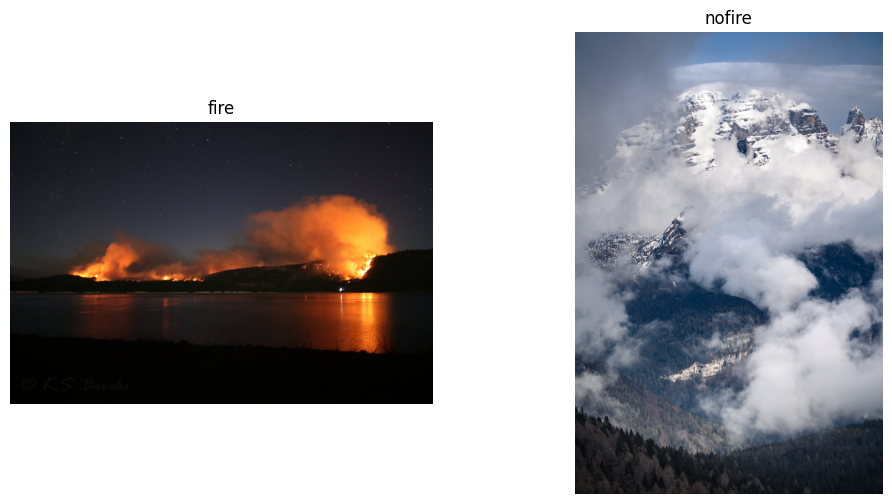

In [18]:
print("Displaying sample images from the dataset")
plt.figure(figsize=(12, 6))
for i, img_dir in enumerate(['fire', 'nofire']):
    path_imgs = path_to_dataset / 'train' / img_dir
    img = PIL.Image.open(path_imgs / os.listdir(path_imgs)[0])
    plt.subplot(1, 2, i+1)
    plt.imshow(img)
    plt.title(img_dir)
    plt.axis('off')